<a href="https://colab.research.google.com/github/NickStafford2/ML-DL-Project1/blob/main/mldl_project1_face_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install keras
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import skimage
from skimage import io
import random
from zipfile import ZipFile

base_zip_folder_location = '/content/drive/MyDrive/MLDL Spring 2025/MLDL_Data_Face-1/MLDL_Data_Face'
base_extraction_location = "/content/drive/MyDrive/MLDL Spring 2025/MLDL_Data_Face-1/MLDL_Data_Face"

class_names = ['Class 1', 'Class 2', 'Class 3']

In [ ]:
for class_name in class_names:
    dir_contents = os.listdir(f"{base_zip_folder_location}/{class_name}")
    for zippedFile in dir_contents:
        if zippedFile.__contains__('.zip'):
            zippedFileNameNoExtension = zippedFile[:2]
            with ZipFile(f"{base_zip_folder_location}/{class_name}/{zippedFile}", 'r') as z:
                z.extractall(f"{base_extraction_location}/{class_name}/{zippedFileNameNoExtension}")

In [ ]:
empty_dirs = []
for class_name in class_names:
  dir_contents = os.listdir(f"{base_extraction_location}/{class_name}")
  for folder in dir_contents:
    folder_contents = os.listdir(f"{base_extraction_location}/{class_name}/{folder}")
    if len(folder_contents) == 0:
      empty_dirs.append(f"{class_name}/{folder}")

print(empty_dirs)

['Class 1/.ipynb_checkpoints', 'Class 2/.ipynb_checkpoints', 'Class 3/16', 'Class 3/3.', 'Class 3/20', 'Class 3/1.', 'Class 3/13', 'Class 3/5.', 'Class 3/19', 'Class 3/17', 'Class 3/8.']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D, Activation, Flatten, Dense
from keras.models import Sequential


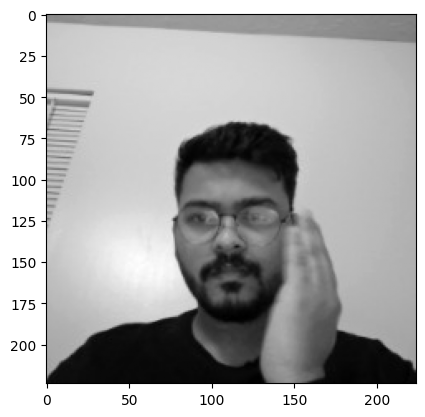

In [ ]:
# read a random image
image_path = "/content/drive/MyDrive/MLDL Spring 2025/MLDL_Data_Face-1/MLDL_Data_Face/Class 3/15/10.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
image.shape

(224, 224)

In [ ]:
string = 'Class 3/15'
string[8:]

'15'

In [ ]:
# copying images for following empty directores in drive
import shutil
import os

empty_dirs = ['Class 3/16', 'Class 3/3', 'Class 3/20', 'Class 3/1', 'Class 3/13', 'Class 3/5', 'Class 3/19', 'Class 3/17', 'Class 3/8']

base_photos_retrieval_path = "/content/drive/MyDrive/MLDL Spring 2025"
base_photos_copy_path = "/content/drive/MyDrive/MLDL Spring 2025/MLDL_Data_Face-1/MLDL_Data_Face"

for empty_dir in empty_dirs:
  files = os.listdir(f"{base_photos_retrieval_path}/{empty_dir[8:]}")
  shutil.copytree(f"{base_photos_retrieval_path}/{empty_dir[8:]}", f"{base_photos_copy_path}/{empty_dir}")
  print(f"done copying {empty_dir}")



done copying Class 3/16
done copying Class 3/3
done copying Class 3/20
done copying Class 3/1
done copying Class 3/13
done copying Class 3/5
done copying Class 3/19
done copying Class 3/17
done copying Class 3/8


In [ ]:
x_train, y_train, x_test, y_test = None


In [ ]:
# adding a 3rd dimension for channel(grayscale) since keras expects batches of images
image_batch = image.reshape(1, image.shape[0], image.shape[1], 1)
image_batch.shape

(1, 224, 224, 1)

In [ ]:
num_filters = 8 # number of conv. filters
conv_filter_size1 = 3 # conv. filter size
pool_size1 = 2 # pooling filter size

cnn_model = Sequential()
cnn_model.add(Convolution2D(10, (7,7), padding='same', input_shape=image_batch.shape[1:])) # random weights initialized
# input shape would be (224, 224, 1)
cnn_model.add(MaxPooling2D(pool_size=pool_size1))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 10)        │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 125440)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │       1,254,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,254,910 (4.79 MB)

 Trainable params: 1,254,910 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
cnn_model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
# train the model
cnn_model.fit(x_train, to_categorical(y_train), epochs=3, verbose=1, validation_data=(x_test, to_categorical(y_test)),)